In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aa464e3b066490e2012094930cddf430


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | yulara
Processing Record 5 of Set 1 | buala
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | mayo
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | muros
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | ola
Processing Record 13 of Set 1 | port blair
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | vila velha
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | vila
Processing Record 20 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 21 of Set 1 | ardesen
Processing Record 22 of Set 1 | puerto colombia
Processing Record 23 of Set 1 |

Processing Record 38 of Set 4 | inderborskiy
City not found. Skipping...
Processing Record 39 of Set 4 | lolua
City not found. Skipping...
Processing Record 40 of Set 4 | pangnirtung
Processing Record 41 of Set 4 | katsuura
Processing Record 42 of Set 4 | haibowan
City not found. Skipping...
Processing Record 43 of Set 4 | adrar
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | usinsk
Processing Record 46 of Set 4 | nchelenge
Processing Record 47 of Set 4 | castro
Processing Record 48 of Set 4 | port said
Processing Record 49 of Set 4 | flin flon
Processing Record 50 of Set 4 | samarai
Processing Record 1 of Set 5 | valle de allende
Processing Record 2 of Set 5 | chokurdakh
Processing Record 3 of Set 5 | khonuu
City not found. Skipping...
Processing Record 4 of Set 5 | egvekinot
Processing Record 5 of Set 5 | freeport
Processing Record 6 of Set 5 | tura
Processing Record 7 of Set 5 | allada
Processing Record 8 of Set 5 | mount isa
Processing Record 9 of Set 5 | c

Processing Record 27 of Set 8 | touros
Processing Record 28 of Set 8 | great yarmouth
Processing Record 29 of Set 8 | ahipara
Processing Record 30 of Set 8 | preobrazheniye
Processing Record 31 of Set 8 | luoyang
Processing Record 32 of Set 8 | manaure
Processing Record 33 of Set 8 | makushino
Processing Record 34 of Set 8 | half moon bay
Processing Record 35 of Set 8 | kota bahru
Processing Record 36 of Set 8 | chaah
Processing Record 37 of Set 8 | pyay
Processing Record 38 of Set 8 | ornskoldsvik
Processing Record 39 of Set 8 | geresk
City not found. Skipping...
Processing Record 40 of Set 8 | hithadhoo
Processing Record 41 of Set 8 | vadso
Processing Record 42 of Set 8 | north battleford
Processing Record 43 of Set 8 | katobu
Processing Record 44 of Set 8 | makokou
Processing Record 45 of Set 8 | saint-imier
Processing Record 46 of Set 8 | kodiak
Processing Record 47 of Set 8 | sobolevo
Processing Record 48 of Set 8 | salamiyah
Processing Record 49 of Set 8 | olga
Processing Record 

Processing Record 18 of Set 12 | santa fe
Processing Record 19 of Set 12 | beyla
Processing Record 20 of Set 12 | sao raimundo nonato
Processing Record 21 of Set 12 | kracheh
City not found. Skipping...
Processing Record 22 of Set 12 | aksarka
Processing Record 23 of Set 12 | westport
Processing Record 24 of Set 12 | liverpool
Processing Record 25 of Set 12 | satuk
Processing Record 26 of Set 12 | mnogovershinnyy
Processing Record 27 of Set 12 | hirara
Processing Record 28 of Set 12 | benguela
Processing Record 29 of Set 12 | tombouctou
Processing Record 30 of Set 12 | finschhafen
Processing Record 31 of Set 12 | pokhara
Processing Record 32 of Set 12 | takoradi
Processing Record 33 of Set 12 | merauke
Processing Record 34 of Set 12 | belgrade
Processing Record 35 of Set 12 | alta floresta
Processing Record 36 of Set 12 | krasnoselkup
Processing Record 37 of Set 12 | vallenar
Processing Record 38 of Set 12 | kerteh
City not found. Skipping...
Processing Record 39 of Set 12 | thunder ba

In [10]:
city_data

[{'City': 'Mar Del Plata',
  'Lat': -38,
  'Lng': -57.56,
  'Max Temp': 46.99,
  'Humidity': 61,
  'Cloudiness': 75,
  'Wind Speed': 8.05,
  'Country': 'AR',
  'Date': '2020-07-07 19:37:32'},
 {'City': 'Tiksi',
  'Lat': 71.69,
  'Lng': 128.87,
  'Max Temp': 34.07,
  'Humidity': 95,
  'Cloudiness': 100,
  'Wind Speed': 6.26,
  'Country': 'RU',
  'Date': '2020-07-07 19:37:32'},
 {'City': 'Saskylakh',
  'Lat': 71.92,
  'Lng': 114.08,
  'Max Temp': 46.74,
  'Humidity': 76,
  'Cloudiness': 35,
  'Wind Speed': 8.5,
  'Country': 'RU',
  'Date': '2020-07-07 19:37:32'},
 {'City': 'Yulara',
  'Lat': -25.24,
  'Lng': 130.99,
  'Max Temp': 35.6,
  'Humidity': 64,
  'Cloudiness': 0,
  'Wind Speed': 5.82,
  'Country': 'AU',
  'Date': '2020-07-07 19:37:32'},
 {'City': 'Buala',
  'Lat': -8.14,
  'Lng': 159.59,
  'Max Temp': 80.28,
  'Humidity': 82,
  'Cloudiness': 37,
  'Wind Speed': 7.83,
  'Country': 'SB',
  'Date': '2020-07-07 19:37:32'},
 {'City': 'Cape Town',
  'Lat': -33.93,
  'Lng': 18.42,
  'M

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.00,-57.56,46.99,61,75,8.05,AR,2020-07-07 19:37:32
1,Tiksi,71.69,128.87,34.07,95,100,6.26,RU,2020-07-07 19:37:32
2,Saskylakh,71.92,114.08,46.74,76,35,8.50,RU,2020-07-07 19:37:32
3,Yulara,-25.24,130.99,35.60,64,0,5.82,AU,2020-07-07 19:37:32
4,Buala,-8.14,159.59,80.28,82,37,7.83,SB,2020-07-07 19:37:32
5,Cape Town,-33.93,18.42,55.00,76,0,6.93,ZA,2020-07-07 19:37:33
6,Mayo,38.89,-76.51,86.00,78,20,6.93,US,2020-07-07 19:37:33
7,Rikitea,-23.12,-134.97,70.25,81,83,13.22,PF,2020-07-07 19:37:33
8,Port Alfred,-33.59,26.89,55.99,79,100,3.00,ZA,2020-07-07 19:37:33
9,Muros,42.78,-9.06,80.01,59,0,10.00,ES,2020-07-07 19:37:33


In [12]:
#Creating new column order
#City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed,
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2020-07-07 19:37:32,-38.00,-57.56,46.99,61,75,8.05
1,Tiksi,RU,2020-07-07 19:37:32,71.69,128.87,34.07,95,100,6.26
2,Saskylakh,RU,2020-07-07 19:37:32,71.92,114.08,46.74,76,35,8.50
3,Yulara,AU,2020-07-07 19:37:32,-25.24,130.99,35.60,64,0,5.82
4,Buala,SB,2020-07-07 19:37:32,-8.14,159.59,80.28,82,37,7.83
...,...,...,...,...,...,...,...,...,...
575,Zhigansk,RU,2020-07-07 19:39:09,66.77,123.37,51.69,66,16,9.98
576,Traralgon,AU,2020-07-07 19:39:09,-38.18,146.53,45.00,98,65,1.99
577,Tiznit,MA,2020-07-07 19:39:09,29.58,-9.50,88.09,22,36,3.18
578,Mansehra,PK,2020-07-07 19:39:10,34.33,73.20,80.49,35,85,3.02


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1594150750.479556

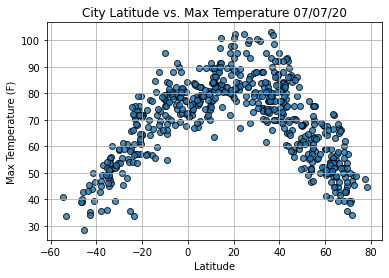

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

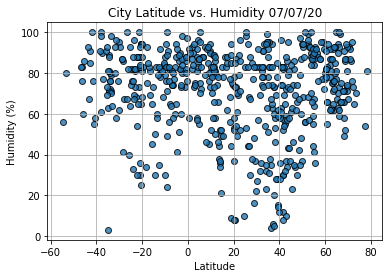

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

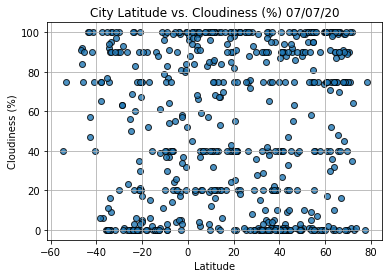

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

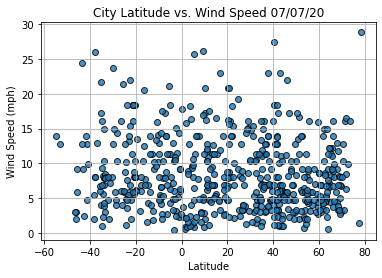

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(f"The r-value is: {r_value:.3f}")

In [23]:
index13=city_data_df.loc[13]
index13

City                       Anadyr
Country                        RU
Date          2020-07-07 19:37:34
Lat                         64.75
Lng                        177.48
Max Temp                     48.2
Humidity                      100
Cloudiness                     75
Wind Speed                   4.47
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
575     True
576    False
577     True
578     True
579    False
Name: Lat, Length: 580, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Tiksi,RU,2020-07-07 19:37:32,71.69,128.87,34.07,95,100,6.26
2,Saskylakh,RU,2020-07-07 19:37:32,71.92,114.08,46.74,76,35,8.50
6,Mayo,US,2020-07-07 19:37:33,38.89,-76.51,86.00,78,20,6.93
9,Muros,ES,2020-07-07 19:37:33,42.78,-9.06,80.01,59,0,10.00
10,Thompson,CA,2020-07-07 19:37:33,55.74,-97.86,75.20,36,40,16.11
...,...,...,...,...,...,...,...,...,...
572,Tilichiki,RU,2020-07-07 19:39:08,60.47,166.10,51.04,82,100,5.26
573,Chernyshevskiy,RU,2020-07-07 19:39:08,63.01,112.47,50.63,87,98,6.71
575,Zhigansk,RU,2020-07-07 19:39:09,66.77,123.37,51.69,66,16,9.98
577,Tiznit,MA,2020-07-07 19:39:09,29.58,-9.50,88.09,22,36,3.18


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [27]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

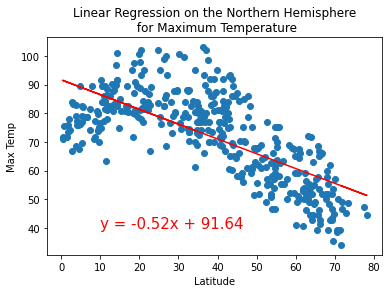

The r-value is: -0.709


In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere\n for Maximum Temperature','Max Temp',(10,40))



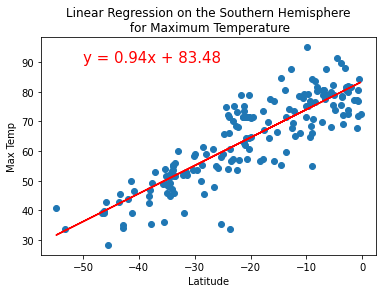

The r-value is: 0.856


In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemisphere\n for Maximum Temperature','Max Temp',(-50,90))


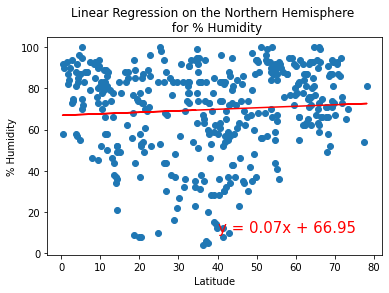

The r-value is: 0.068


In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


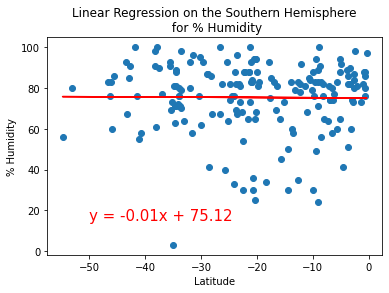

The r-value is: -0.009


In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,15))

#The correlation between the latitude and percent humidity is very low because 
#the r-value is less than 0.04 for the Northern and Southern Hemispheres for 
#the plots shown here. This means that percent humidity is unpredictable due to changing 
#weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

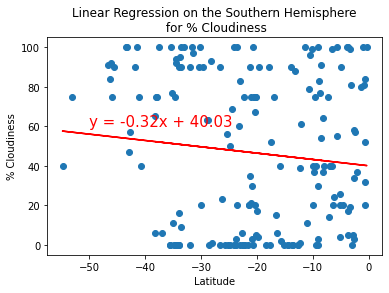

The r-value is: -0.110


In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% Cloudiness',(-50,60))

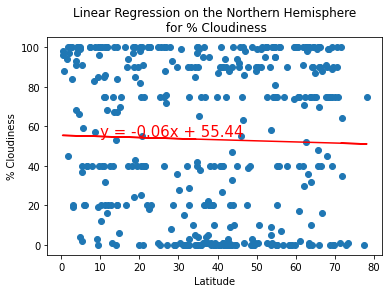

The r-value is: -0.029


In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere\n for % Cloudiness','% Cloudiness',(10,55))

#The correlation between the latitude and percent cloudiness is very low because 
#the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the 
#Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due 
#to changing weather patterns that can 
#increase or decrease percent cloudiness. Check the r-values for your plots. 

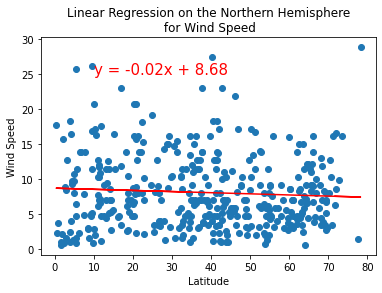

The r-value is: -0.064


In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere\n for Wind Speed','Wind Speed',(10,25))

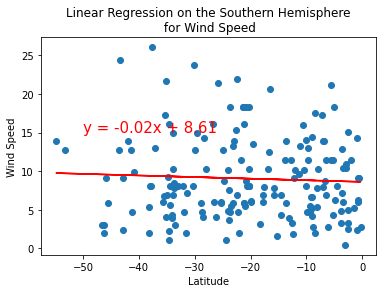

The r-value is: -0.051


In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere\n for Wind Speed','Wind Speed',(-50,15))
